# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [12]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

In [8]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [67]:
# Create the data parameters
weight = 0.3
bias = 0.9
start = 0
stop = 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start, stop, step).unsqueeze(dim=1)
y = weight * X + bias


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [68]:
# Split the data into training and testing
split_size = int(0.8 * len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [69]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

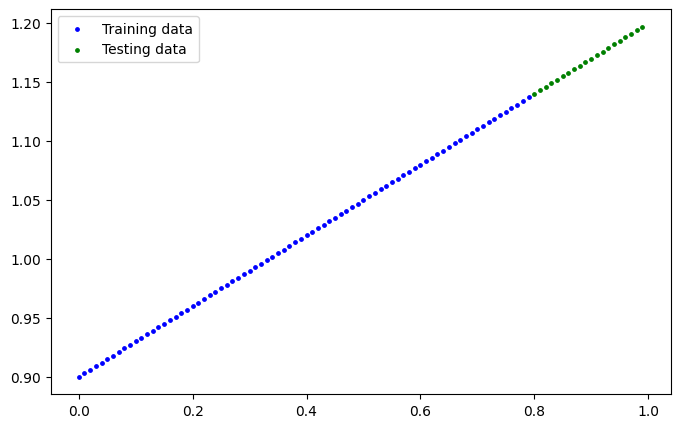

In [70]:
# Plot the training and testing data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize = (8,5))
  plt.scatter(train_data, train_labels, c="b", s=6, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=6, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

  plt.legend(prop={"size" : 10})

plot_predictions(X_train, y_train, X_test, y_test)

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [71]:
# Create PyTorch linear regression model by subclassing nn.Module
class MyLinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float).unsqueeze(dim=1),
                                requires_grad = True)
    self.bias =  nn.Parameter(torch.randn(1, dtype=torch.float),
                              requires_grad = True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

class MyLinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [108]:
# Instantiate the model and put it to the target device
model_v1 = MyLinearRegressionModelV1().to(device)
model_v2 = MyLinearRegressionModelV2().to(device)

In [109]:
next(model_v1.parameters()).device, next(model_v2.parameters()).device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [110]:
model_v1.state_dict(), model_v2.state_dict()

(OrderedDict([('weights', tensor([[0.3367]], device='cuda:0')),
              ('bias', tensor([0.1288], device='cuda:0'))]),
 OrderedDict([('linear_layer.weight', tensor([[-0.2191]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.2018], device='cuda:0'))]))

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [111]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer_v1 = torch.optim.SGD(model_v1.parameters(),
                               lr = 0.01)
optimizer_v2 = torch.optim.SGD(model_v2.parameters(),
                               lr = 0.01)

In [112]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_v1.train()
  model_v2.train()

  # 1. Forward pass
  y_pred_v1 = model_v1(X_train)
  y_pred_v2 = model_v2(X_train)

  # 2. Calculate loss
  loss_v1 = loss_fn(y_pred_v1, y_train)
  loss_v2 = loss_fn(y_pred_v2, y_train)

  # 3. Zero gradients
  optimizer_v1.zero_grad()
  optimizer_v2.zero_grad()

  # 4. Backpropagation
  loss_v1.backward()
  loss_v2.backward()

  # 5. Step the optimizer
  optimizer_v1.step()
  optimizer_v2.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    model_v1.eval()
    model_v2.eval()

    # 1. Forward pass
    with torch.inference_mode():
      test_pred_v1 = model_v1(X_test)
      test_pred_v2 = model_v2(X_test)
    # 2. Calculate test loss
      test_loss_v1 = loss_fn(test_pred_v1, y_test)
      test_loss_v2 = loss_fn(test_pred_v2, y_test)

    # Print out what's happening
    print(f"Epoch: {epoch} | Train loss V1: {loss_v1:.3f} | Test loss V1: {test_loss_v1:.3f}")
    print(f"Epoch: {epoch} | Train loss V2: {loss_v2:.3f} | Test loss V2: {test_loss_v2:.3f}")

Epoch: 0 | Train loss V1: 0.757 | Test loss V1: 0.725
Epoch: 0 | Train loss V2: 0.903 | Test loss V2: 1.149
Epoch: 20 | Train loss V1: 0.525 | Test loss V1: 0.454
Epoch: 20 | Train loss V2: 0.672 | Test loss V2: 0.879
Epoch: 40 | Train loss V1: 0.294 | Test loss V1: 0.183
Epoch: 40 | Train loss V2: 0.441 | Test loss V2: 0.608
Epoch: 60 | Train loss V1: 0.077 | Test loss V1: 0.073
Epoch: 60 | Train loss V2: 0.210 | Test loss V2: 0.337
Epoch: 80 | Train loss V1: 0.053 | Test loss V1: 0.116
Epoch: 80 | Train loss V2: 0.044 | Test loss V2: 0.119
Epoch: 100 | Train loss V1: 0.046 | Test loss V1: 0.105
Epoch: 100 | Train loss V2: 0.033 | Test loss V2: 0.077
Epoch: 120 | Train loss V1: 0.039 | Test loss V1: 0.089
Epoch: 120 | Train loss V2: 0.026 | Test loss V2: 0.061
Epoch: 140 | Train loss V1: 0.032 | Test loss V1: 0.074
Epoch: 140 | Train loss V2: 0.019 | Test loss V2: 0.045
Epoch: 160 | Train loss V1: 0.025 | Test loss V1: 0.058
Epoch: 160 | Train loss V2: 0.012 | Test loss V2: 0.028
Epoc

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [113]:
# Make predictions with the model
model_v1.eval()
model_v2.eval()
with torch.inference_mode():
  y_preds_v1 = model_v1(X_test)
  y_preds_v2 = model_v2(X_test)

y_preds_v1, y_preds_v2

(tensor([[1.1464],
         [1.1495],
         [1.1525],
         [1.1556],
         [1.1587],
         [1.1617],
         [1.1648],
         [1.1679],
         [1.1709],
         [1.1740],
         [1.1771],
         [1.1801],
         [1.1832],
         [1.1863],
         [1.1893],
         [1.1924],
         [1.1955],
         [1.1985],
         [1.2016],
         [1.2047]], device='cuda:0'),
 tensor([[1.1313],
         [1.1342],
         [1.1371],
         [1.1401],
         [1.1430],
         [1.1459],
         [1.1489],
         [1.1518],
         [1.1547],
         [1.1577],
         [1.1606],
         [1.1635],
         [1.1665],
         [1.1694],
         [1.1723],
         [1.1753],
         [1.1782],
         [1.1811],
         [1.1840],
         [1.1870]], device='cuda:0'))

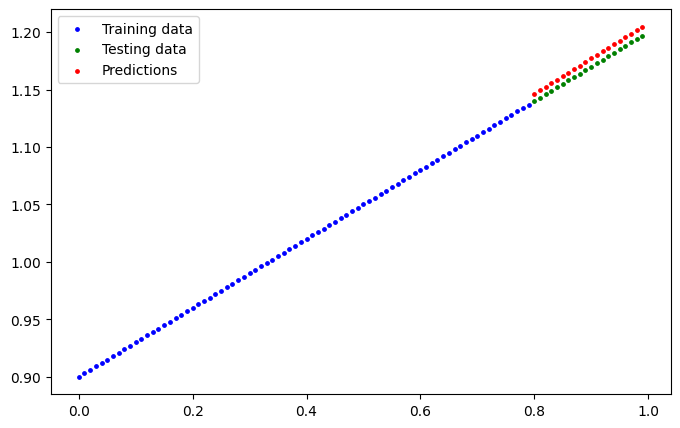

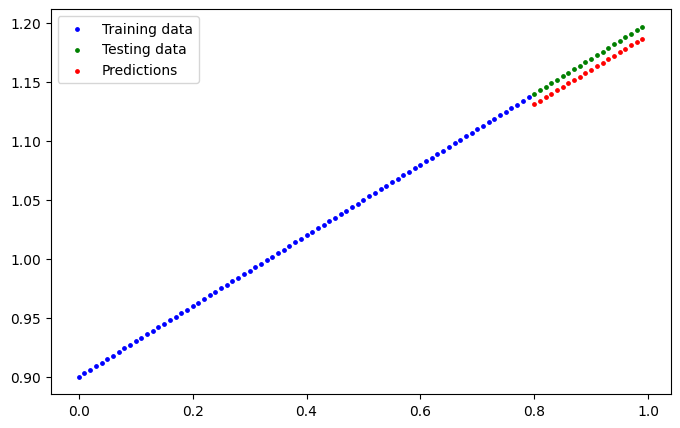

In [114]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(test_data = X_test.cpu(),
                 predictions = y_preds_v1.cpu())

plot_predictions(test_data = X_test.cpu(),
                 predictions = y_preds_v2.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [119]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_V1_NAME = "01_pytorch_workflow_model_v1.pth"
MODEL_V2_NAME = "01_pytorch_workflow_model_v2.pth"

MODEL_SAVE_PATH_V1 = MODEL_PATH / MODEL_V1_NAME
MODEL_SAVE_PATH_V2 = MODEL_PATH / MODEL_V2_NAME

# 3. Save the model state dict
print(f"Saving model V1 to: {MODEL_SAVE_PATH_V1}")
torch.save(obj=model_v1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH_V1)
print(f"Saving model V2 to: {MODEL_SAVE_PATH_V2}")
torch.save(obj=model_v2.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH_V2)

Saving model V1 to: models/01_pytorch_workflow_model_v1.pth
Saving model V2 to: models/01_pytorch_workflow_model_v2.pth


In [126]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_v1 = MyLinearRegressionModelV1()
loaded_model_v2 = MyLinearRegressionModelV2()

loaded_model_v1.load_state_dict(torch.load(MODEL_SAVE_PATH_V1))
loaded_model_v2.load_state_dict(torch.load(MODEL_SAVE_PATH_V2))

<All keys matched successfully>

In [129]:
# Make predictions with loaded model and compare them to the previous
loaded_model_v1.to(device).eval()
loaded_model_v2.to(device).eval()
with torch.inference_mode():
  y_preds_v1 = loaded_model_v1(X_test)
  y_preds_v2 = loaded_model_v2(X_test)

y_preds_v1, y_preds_v2

(tensor([[1.1464],
         [1.1495],
         [1.1525],
         [1.1556],
         [1.1587],
         [1.1617],
         [1.1648],
         [1.1679],
         [1.1709],
         [1.1740],
         [1.1771],
         [1.1801],
         [1.1832],
         [1.1863],
         [1.1893],
         [1.1924],
         [1.1955],
         [1.1985],
         [1.2016],
         [1.2047]], device='cuda:0'),
 tensor([[1.1313],
         [1.1342],
         [1.1371],
         [1.1401],
         [1.1430],
         [1.1459],
         [1.1489],
         [1.1518],
         [1.1547],
         [1.1577],
         [1.1606],
         [1.1635],
         [1.1665],
         [1.1694],
         [1.1723],
         [1.1753],
         [1.1782],
         [1.1811],
         [1.1840],
         [1.1870]], device='cuda:0'))

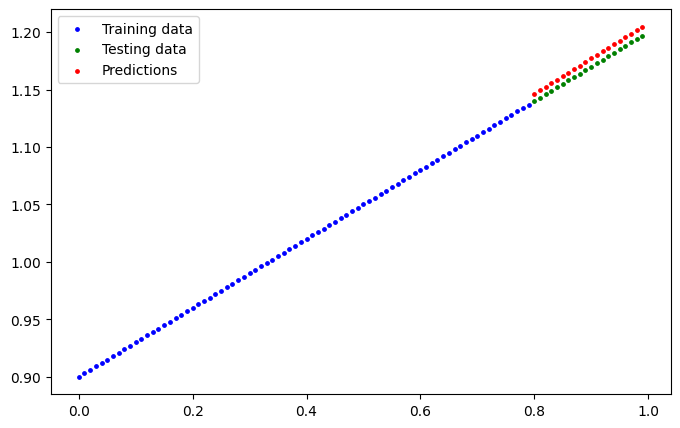

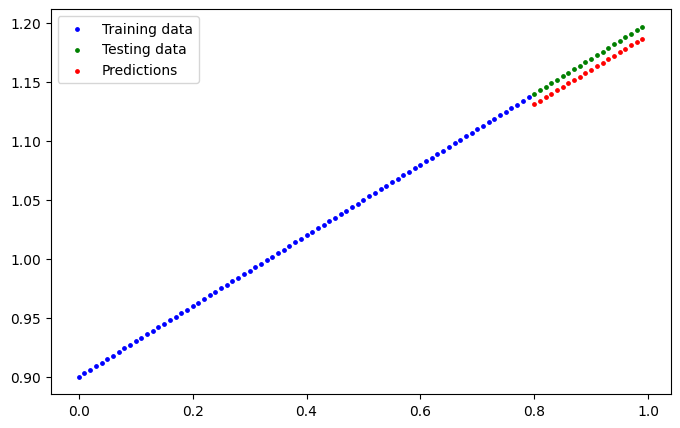

In [130]:
plot_predictions(test_data = X_test.cpu(),
                 predictions = y_preds_v1.cpu())

plot_predictions(test_data = X_test.cpu(),
                 predictions = y_preds_v2.cpu())